In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Database_Chop = pd.read_csv("Database_CHOP.csv")
Database_MACD = pd.read_csv("Database_MACD.csv")
Database_Price_Open = pd.read_csv("Database_Price_Open.csv")
Database_Rendement = pd.read_csv("Database_Rendement.csv")
Database_RSI = pd.read_csv("Database_RSI.csv")

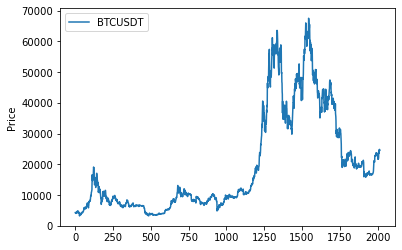

In [3]:
Database_Price_Open.plot(y=['BTCUSDT'])
plt.ylabel("Price")
plt.show()

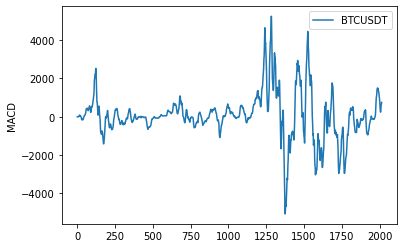

In [4]:
Database_MACD.plot(y=['BTCUSDT'])
plt.ylabel("MACD")
plt.show()

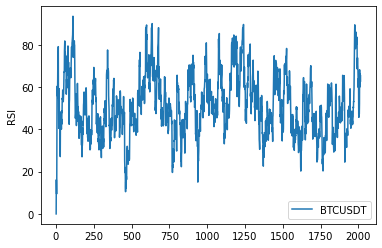

In [5]:
Database_RSI.plot(y=['BTCUSDT'])
plt.ylabel("RSI")
plt.show()

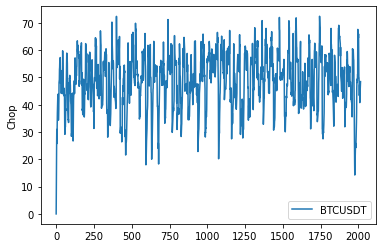

In [6]:
Database_Chop.plot(y=['BTCUSDT'])
plt.ylabel("Chop")
plt.show()

In [7]:
def df_coin(Coin):
    df = pd.DataFrame({'Open': Database_Price_Open[f'{Coin}'],'Rendement': Database_Rendement[f'{Coin}'], 'MACD': Database_MACD[f'{Coin}'],'CHOP': Database_Chop[f'{Coin}'],'RSI': Database_RSI[f'{Coin}']})
    df = df.dropna()
    return df

In [8]:
df_BTC = df_coin('BTCUSDT')
df_ETH = df_coin('ETHUSDT')
df_BNB = df_coin('BNBUSDT')
df_ADA = df_coin('ADAUSDT')
df_XRP = df_coin('XRPUSDT')


In [9]:
df_BTC.to_csv('df_BTC.csv', index = False)
df_ETH.to_csv('df_ETH.csv', index = False)
df_BNB.to_csv('df_BNB.csv', index = False)
df_ADA.to_csv('df_ADA.csv', index = False)
df_XRP.to_csv('df_XRP.csv', index = False)

In [10]:
df_BTC2 = pd.read_csv("df_BTC_w_NLP_values.csv")
df_ETH2 = pd.read_csv("df_ETH_w_NLP_values.csv")
df_BNB2 = pd.read_csv("df_BNB_w_NLP_values.csv")
df_ADA2 = pd.read_csv("df_ADA_w_NLP_values.csv")
df_XRP2 = pd.read_csv("df_XRP_w_NLP_values.csv")

In [11]:
df_ETH2

,Dates,Open,Rendement,MACD,CHOP,RSI,value
0,2017-08-18,302.00,-2.877483,-0.180385,15.067662,0.000000,NaN
1,2017-08-19,293.31,-1.329651,-0.324426,23.726201,0.000000,NaN
2,2017-08-20,289.41,3.348191,-0.086291,32.978106,45.615072,0.073483
3,2017-08-21,299.10,7.335339,1.007500,25.281774,77.810449,NaN
4,2017-08-22,321.04,-2.737977,1.069239,17.342394,57.402252,0.090333
...,...,...,...,...,...,...,...
2009,2023-02-17,1637.83,3.417937,25.828515,50.976620,60.794104,NaN
2010,2023-02-18,1693.81,-0.129294,30.650552,50.392702,60.538393,NaN
2011,2023-02-19,1691.62,-0.702285,33.132313,50.247633,59.125477,NaN
2012,2023-02-20,1679.74,1.400812,36.575376,50.808385,61.064582,NaN


In [12]:
df_ETH

,Open,Rendement,MACD,CHOP,RSI
1,293.96,-2.877483,-0.180385,15.067662,0.000000
2,290.91,-1.329651,-0.324426,23.726201,0.000000
3,299.10,3.348191,-0.086291,32.978106,45.615072
4,323.29,7.335339,1.007500,25.281774,77.810449
5,309.80,-2.737977,1.069239,17.342394,57.402252
...,...,...,...,...,...
2010,1693.87,3.417937,25.828515,50.976620,60.794104
2011,1691.62,-0.129294,30.650552,50.392702,60.538393
2012,1679.75,-0.702285,33.132313,50.247633,59.125477
2013,1703.27,1.400812,36.575376,50.808385,61.064582


In [13]:
def stateChop(row) : 
    stateChop = 1

    if row['CHOP'] >= 61.8 :
        stateChop = 0
    #if  38.2 < row['CHOP'] < 61.8 :
    #    stateChop = 0.5
    return stateChop    

In [14]:
def stateRSI(row):
    stateRSI = 1

    if row['RSI'] >= 70:
        stateRSI = 0
    # if  30 < row['RSI'] < 70 :
    #     stateRSI = 0.5

    return stateRSI   

In [15]:
def stateMACD(row,previous_row):
    stateMACD = 0.5

    if previous_row['MACD'] < 0 and row['MACD'] > 0:
        stateMACD = 1
    elif  previous_row['MACD'] > 0 and row['MACD'] < 0:
        stateMACD = 0
    # elif previous_row['MACD'] < 0 and row['MACD'] < 0 and abs(row['MACD']) > abs(previous_row['MACD'])*1.1:
    #     stateMACD = 0
    # elif previous_row['MACD'] > 0 and row['MACD'] > 0 and abs(row['MACD']) > abs(previous_row['MACD'])*1.1:
    #     stateMACD = 1

    return stateMACD   

In [16]:
def stateNLP(row):
    stateNLP = 1

    if row['value'] <= 0:
        stateNLP = 0

    return stateNLP   

Strategie avec RSI + MACD

In [17]:
def buy_condition(row,previous_row):
    buy = False

    
    if stateRSI(row) == 0: # RSI >= 70
        buy = False
    elif stateRSI(row) == 1 or  stateMACD(row,previous_row) == 1: # RSI < 70 or  previous_row['MACD'] < 0 and row['MACD'] > 0
        buy = True
    return buy

In [18]:
def sell_condition(row,previous_row):
    sell = False
    # if stateChop(row) == 1:
    #     #print('check nlp')
    #     sell = False
    # elif stateChop(row) == 0.5:
    #     #print('hold')
    #     sell = False
    # else:
    if stateRSI(row) == 0 or stateMACD(row,previous_row) == 0: # RSI >= 70 or previous_row['MACD'] > 0 and row['MACD'] < 0
            sell = True
    elif stateRSI(row) == 1: # RSI < 70
            #print('hold')
            sell = False
        # else:
        #     if stateMACD(row,previous_row) == 1:
        #         sell = True
    return sell    

In [19]:
def trading_loop(df):
  dt  = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet'])
  usdt = 1000
  initalWallet = usdt
  coin = 0
  wallet = 1000
  lastAth = 0
  makerFee = 0.0005
  takerFee = 0.0007
  stopLoss = 0
  takeProfit = 0
  buyReady = True
  sellReady = True
  previous_row = df.iloc[0]
  for index,row in df.iterrows():
      # print(row)
      if buy_condition(row,previous_row) == True and usdt > 0 and buyReady == True:
          buyPrice = row['Open']

          stopLoss = buyPrice - 0.02 * buyPrice
          takeProfit = buyPrice + 0.1 * buyPrice


          coin = usdt / buyPrice
          fee = takerFee * coin
          coin = coin - fee
          usdt = 0
          wallet = coin * row['Open']  
          if wallet > lastAth:
            lastAth = wallet


          #print(f"Buy {coin} Coin at",buyPrice,'$ the', index)
          myrow = {'date': index,'position': "Buy", 'reason': 'Buy Market','price': buyPrice,'frais': fee*row['Open'],'fiat': usdt,'coins': coin,'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)
          
      elif row['Open'] < stopLoss and coin > 0:
        
        sellPrice = stopLoss

        usdt = coin * sellPrice
        fee = makerFee * usdt
        usdt = usdt - fee
        coin = 0
        buyReady = False
        wallet = usdt

        if wallet > lastAth:
          lastAth = wallet

        #print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
        myrow = {'date': index,'position': "Sell", 'reason': 'Sell Stop Loss', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
        dt = dt.append(myrow,ignore_index=True)

      elif row['Open'] > takeProfit and coin > 0:

          sellPrice = takeProfit

          usdt = coin * sellPrice
          fee = makerFee * usdt
          usdt = usdt - fee
          coin = 0
          buyReady = True
          wallet = usdt
          if wallet > lastAth:
            lastAth = wallet

            
          #print("Sell COIN at Take Profit Loss",sellPrice,'$ the', index)
          myrow = {'date': index,'position': "Sell", 'reason': 'Sell Take Profit', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)     

      elif sell_condition(row, previous_row) == True:
        buyReady = True
        if coin > 0 and sellReady == True:
          sellPrice = row['Open']
          usdt = coin * sellPrice
          frais = takerFee * usdt
          usdt = usdt - frais
          #print(f"Sell {coin} Coin at",sellPrice,'$ the', index)
          coin = 0
          wallet = usdt
          if wallet > lastAth:
            lastAth = wallet  
          myrow = {'date': index,'position': "Sell", 'reason': 'Sell Market', 'price': sellPrice, 'frais': frais, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)

      previous_row = row    
  return dt


Strategie avec RSI + MACD + Choppiness index + NLP

In [20]:
def buy_condition2(row,previous_row):
    buy = False

    if stateRSI(row) == 0 : # RSI >= 70
        buy = False
    elif stateRSI(row) == 1 or  stateMACD(row,previous_row) == 1 or (stateChop(row) == 1 and stateNLP == 1): # RSI < 70 or  previous_row['MACD'] < 0 and row['MACD'] > 0
        buy = True

    return buy

In [21]:
def sell_condition2(row,previous_row):
    sell = False
    if stateRSI(row) == 0 or stateMACD(row,previous_row) == 0 or (stateChop(row) == 1 and stateNLP == 0): # RSI >= 70 or previous_row['MACD'] > 0 and row['MACD'] < 0
        sell = True
    elif stateRSI(row) == 1 : # RSI < 70       
        sell = False
           
    return sell

In [22]:
def trading_loop2(df):
  dt  = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet'])
  usdt = 1000
  initalWallet = usdt
  coin = 0
  wallet = 1000
  lastAth = 0
  makerFee = 0.0005
  takerFee = 0.0007
  stopLoss = 0
  takeProfit = 0
  buyReady = True
  sellReady = True
  previous_row = df.iloc[0]
  for index,row in df.iterrows():
      # print(row)
      if buy_condition2(row,previous_row) == True and usdt > 0 and buyReady == True:
          buyPrice = row['Open']

          stopLoss = buyPrice - 0.02 * buyPrice
          takeProfit = buyPrice + 0.1 * buyPrice


          coin = usdt / buyPrice
          fee = takerFee * coin
          coin = coin - fee
          usdt = 0
          wallet = coin * row['Open']  
          if wallet > lastAth:
            lastAth = wallet


          #print(f"Buy {coin} Coin at",buyPrice,'$ the', index)
          myrow = {'date': index,'position': "Buy", 'reason': 'Buy Market','price': buyPrice,'frais': fee*row['Open'],'fiat': usdt,'coins': coin,'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)
          
      elif row['Open'] < stopLoss and coin > 0:
        
        sellPrice = stopLoss

        usdt = coin * sellPrice
        fee = makerFee * usdt
        usdt = usdt - fee
        coin = 0
        buyReady = False
        wallet = usdt

        if wallet > lastAth:
          lastAth = wallet

        #print("Sell COIN at Stop Loss",sellPrice,'$ the', index)
        myrow = {'date': index,'position': "Sell", 'reason': 'Sell Stop Loss', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
        dt = dt.append(myrow,ignore_index=True)

      elif row['Open'] > takeProfit and coin > 0:

          sellPrice = takeProfit

          usdt = coin * sellPrice
          fee = makerFee * usdt
          usdt = usdt - fee
          coin = 0
          buyReady = True
          wallet = usdt
          if wallet > lastAth:
            lastAth = wallet

            
          #print("Sell COIN at Take Profit Loss",sellPrice,'$ the', index)
          myrow = {'date': index,'position': "Sell", 'reason': 'Sell Take Profit', 'price': sellPrice, 'frais': fee, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)     

      elif sell_condition2(row, previous_row) == True:
        buyReady = True
        if coin > 0 and sellReady == True:
          sellPrice = row['Open']
          usdt = coin * sellPrice
          frais = takerFee * usdt
          usdt = usdt - frais
          #print(f"Sell {coin} Coin at",sellPrice,'$ the', index)
          coin = 0
          wallet = usdt
          if wallet > lastAth:
            lastAth = wallet  
          myrow = {'date': index,'position': "Sell", 'reason': 'Sell Market', 'price': sellPrice, 'frais': frais, 'fiat': usdt, 'coins': coin, 'wallet': wallet, 'drawBack':(wallet-lastAth)/lastAth}
          dt = dt.append(myrow,ignore_index=True)

      previous_row = row    
  return dt


Resulat du backtest

In [23]:
def result(df,dt):
    usdt = 1000
    initalWallet = usdt
    wallet = 1000
    print("Period : [" + str(df.index[0]) + "] -> [" +str(df.index[len(df)-1]) + "]")
    dt = dt.set_index(dt['date'])
    dt.index = pd.to_datetime(dt.index)
    dt['resultat'] = dt['wallet'].diff()
    dt['resultat%'] = dt['wallet'].pct_change()*100
    dt.loc[dt['position']=='Buy','resultat'] = None
    dt.loc[dt['position']=='Buy','resultat%'] = None

    dt['tradeIs'] = ''
    dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
    dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

    iniClose = df_BTC.iloc[0]['Open']
    lastClose = df_BTC.iloc[len(df_BTC)-1]['Open']
    holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
    algoPorcentage = ((dt['wallet'][-1] - initalWallet)/initalWallet) * 100
    vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

    print("Starting balance : 1000 $")
    print("Final balance :",round(dt['wallet'][-1],2),"$")
    print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
    print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
    print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
    print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
    print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
    print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
    print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
    print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
    print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
    print("Total fee : ",round(dt['frais'].sum(),2),"$")
    reasons = dt['reason'].unique()
    for r in reasons:
        print(r+" number :",dt.groupby('reason')['date'].nunique()[r])

    dt[['wallet','price']].plot(subplots=True, figsize=(20,10))
    dt

In [24]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Pour strategie MACD + RSI -> result(df_ETH,trading_loop(df_ETH))

Pour la strategie MACD + RSI + Choppiness Index + NLP -> result(df_ETH2,trading_loop2(df_ETH2)) 
pour cette stratégie on a un problème au niveau de df_ETH2 que nous n'arrivons pas a régler. car si on utilise la premiere strategie sur df_ETH2 on a pas les mêmes valeurs alors que les dataframes sont les même

Period : [1] -> [2014]
Starting balance : 1000 $
Final balance : 5665.88 $
Performance vs US Dollar : 466.59 %
Buy and Hold Performence : 497.73 %
Performance vs Buy and Hold : -6.26 %
Number of negative trades :  56
Number of positive trades :  39
Average Positive Trades :  7.92 %
Average Negative Trades :  -2.05 %
Best trade +9.95 %, the  93
Worst trade -2.05 %, the  152
Worst drawBack -14.000000000000002 %
Total fee :  351.42 $
Buy Market number : 95
Sell Market number : 18
Sell Stop Loss number : 56
Sell Take Profit number : 21


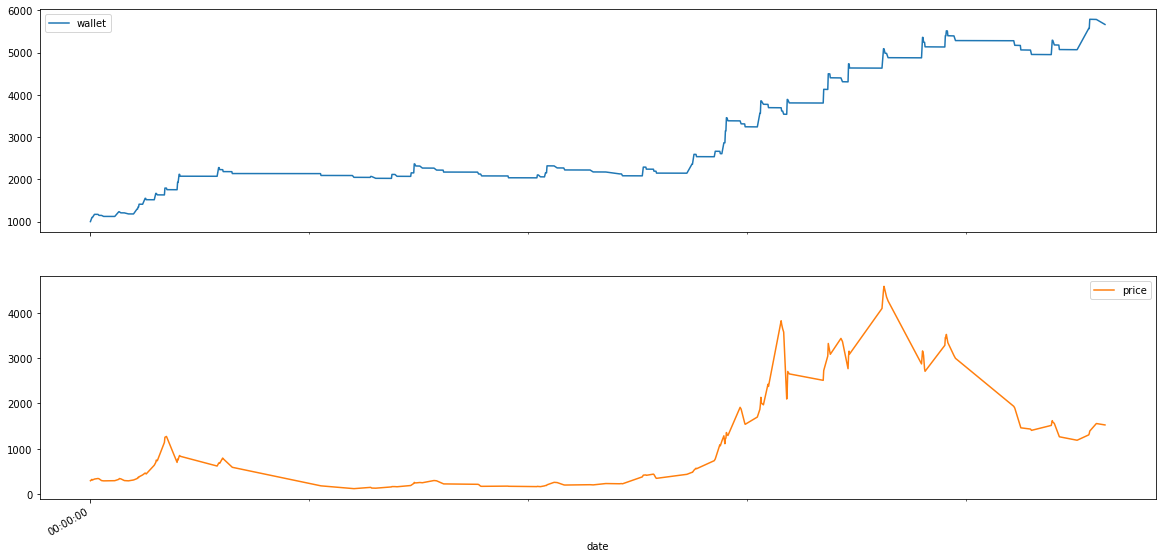

In [25]:
result(df_ETH,trading_loop(df_ETH))

Period : [244] -> [2014]
Starting balance : 1000 $
Final balance : 4418.4 $
Performance vs US Dollar : 341.84 %
Buy and Hold Performence : 497.73 %
Performance vs Buy and Hold : -31.32 %
Number of negative trades :  37
Number of positive trades :  30
Average Positive Trades :  7.99 %
Average Negative Trades :  -2.05 %
Best trade +9.95 %, the  254
Worst trade -2.05 %, the  829
Worst drawBack -12.0 %
Total fee :  199.22 $
Buy Market number : 67
Sell Take Profit number : 14
Sell Market number : 16
Sell Stop Loss number : 37


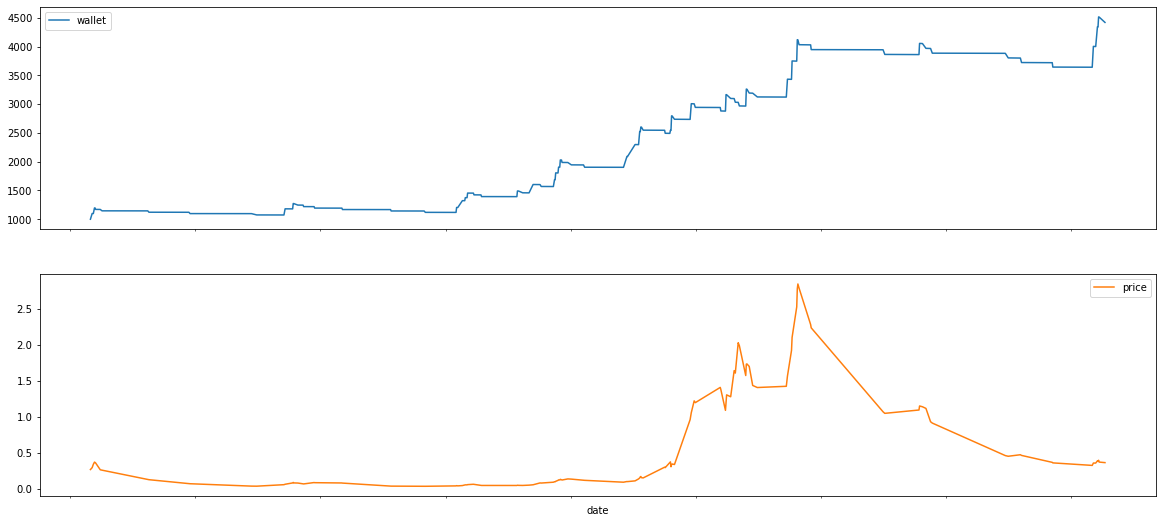

In [26]:
result(df_ADA,trading_loop(df_ADA))

Period : [82] -> [2014]
Starting balance : 1000 $
Final balance : 6132.81 $
Performance vs US Dollar : 513.28 %
Buy and Hold Performence : 497.73 %
Performance vs Buy and Hold : 3.13 %
Number of negative trades :  47
Number of positive trades :  35
Average Positive Trades :  8.49 %
Average Negative Trades :  -2.05 %
Best trade +9.95 %, the  141
Worst trade -2.05 %, the  151
Worst drawBack -10.0 %
Total fee :  318.05 $
Buy Market number : 82
Sell Stop Loss number : 47
Sell Take Profit number : 22
Sell Market number : 13


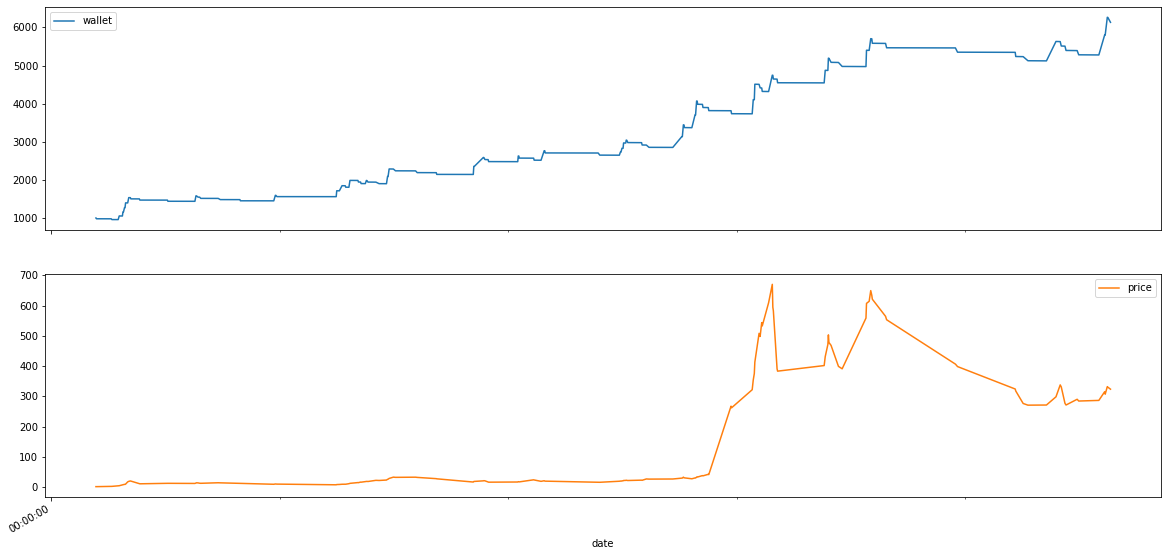

In [27]:
result(df_BNB,trading_loop(df_BNB))

Period : [261] -> [2014]
Starting balance : 1000 $
Final balance : 1820.18 $
Performance vs US Dollar : 82.02 %
Buy and Hold Performence : 497.73 %
Performance vs Buy and Hold : -83.52 %
Number of negative trades :  44
Number of positive trades :  19
Average Positive Trades :  8.52 %
Average Negative Trades :  -2.03 %
Best trade +9.95 %, the  406
Worst trade -2.05 %, the  463
Worst drawBack -20.0 %
Total fee :  101.83 $
Buy Market number : 64
Sell Stop Loss number : 43
Sell Take Profit number : 13
Sell Market number : 7


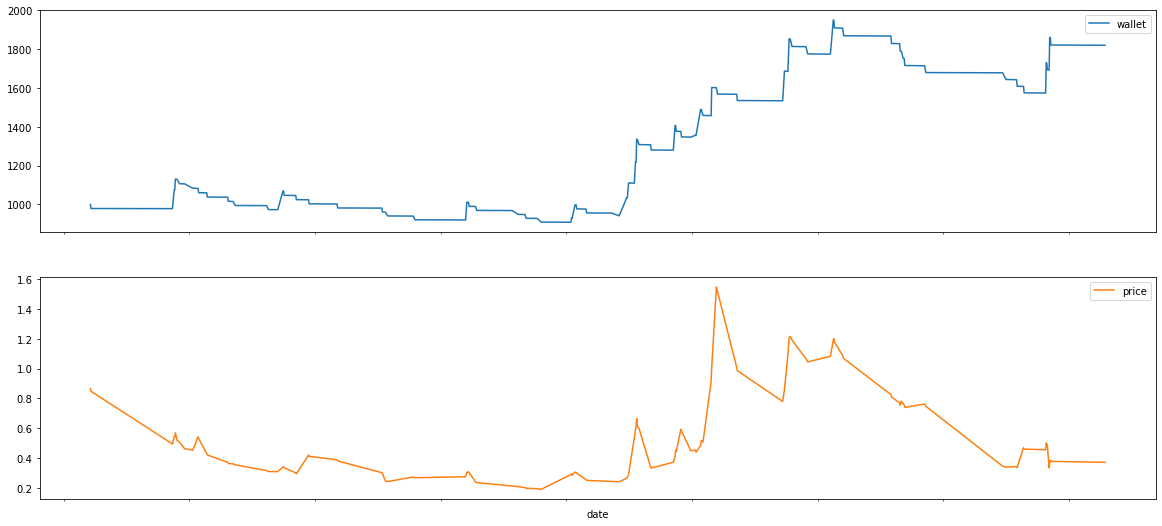

In [28]:
df_XRP = df_XRP.dropna()

result(df_XRP,trading_loop(df_XRP))

In [29]:
# print("Period : [" + str(df_BTC.index[0]) + "] -> [" +str(df_BTC.index[len(df_BTC)-1]) + "]")
# dt = dt.set_index(dt['date'])
# dt.index = pd.to_datetime(dt.index)
# dt['resultat'] = dt['wallet'].diff()
# dt['resultat%'] = dt['wallet'].pct_change()*100
# dt.loc[dt['position']=='Buy','resultat'] = None
# dt.loc[dt['position']=='Buy','resultat%'] = None

# dt['tradeIs'] = ''
# dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
# dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

# iniClose = df_BTC.iloc[0]['Open']
# lastClose = df_BTC.iloc[len(df_BTC)-1]['Open']
# holdPorcentage = ((lastClose - iniClose)/iniClose) * 100
# algoPorcentage = ((wallet - initalWallet)/initalWallet) * 100
# vsHoldPorcentage = ((algoPorcentage - holdPorcentage)/holdPorcentage) * 100

# print("Starting balance : 1000 $")
# print("Final balance :",round(wallet,2),"$")
# print("Performance vs US Dollar :",round(algoPorcentage,2),"%")
# print("Buy and Hold Performence :",round(holdPorcentage,2),"%")
# print("Performance vs Buy and Hold :",round(vsHoldPorcentage,2),"%")
# print("Number of negative trades : ",dt.groupby('tradeIs')['date'].nunique()['Bad'])
# print("Number of positive trades : ",dt.groupby('tradeIs')['date'].nunique()['Good'])
# print("Average Positive Trades : ",round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(),2),"%")
# print("Average Negative Trades : ",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()/dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(),2),"%")
# idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
# idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
# print("Best trade +"+str(round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(),2)),"%, the ",dt['date'][idbest])
# print("Worst trade",round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(),2),"%, the ",dt['date'][idworst])
# print("Worst drawBack", str(100*round(dt['drawBack'].min(),2)),"%")
# print("Total fee : ",round(dt['frais'].sum(),2),"$")
# reasons = dt['reason'].unique()
# for r in reasons:
#   print(r+" number :",dt.groupby('reason')['date'].nunique()[r])

# dt[['wallet','price']].plot(subplots=True, figsize=(20,10))
# dt